In [62]:
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLines

plt.rcParams['text.usetex'] = True

In [63]:
def Damping_ratio(eigenvalue:complex) -> float:
    
    '''
    Function to calculate the Damping ratio of the given eigenvalue

    Input: Individual complex eigenvalue

    Output: Damping ratio of the given eigenvalue
    
    '''	

    real = np.real(eigenvalue)
    img = np.imag(eigenvalue)
    
    chi = -real/np.sqrt(real**2 + img**2)

    return chi


def filter_positive_imaginary_part(eigenvalues):

    '''
    Function to filter positive imaginary part of the eigenvalues

    Input: Array of eigenvalues

    Output: Array of eigenvalues with positive imaginary part
    
    '''	

    filtered_eigenvalues = [eig_val for eig_val in eigenvalues if eig_val.imag > 0 and eig_val.imag <= 70 and eig_val.real >= -15]
    
    return filtered_eigenvalues

In [64]:
g = 9.81                        # Gravity
w = 1.448                       # Wheelbase
eps = np.radians(26.8)          # Caster angle
a_n = 0.105                     # Trail
m_0 = 195                       # Motorcycle mass
b_0 = 0.722                     # CoM longitudinal position
h_0 = 0.482                     # CoM vertical position
I_0xx = 13.5                    # Moments of inertia
I_0xz = 3                       # Moments of inertia
I_0zz = 55                      # Moments of inertia
m = 270                         # Total mass (w/rider)
b = 0.688                       # CoM longitudinal position (w/rider)
h = 0.64                        # CoM vertical position (w/rider)
I_xx = 35.5                     # Moments of inertia (w/rider)
I_xz = -1.7                     # Moments of inertia (w/rider)
I_zz = 59.3                     # Moments of inertia (w/rider)
m_f = 34                        # Front assembly mass
e_f = 0.025                     # Front CoM coordinates 
h_f = 0.6                       # Front CoM coordinates
I_fzz = 0.83                    # Front moment of inertia
I_omega_f = 0.6                 # Front wheel spin inertia
I_omega_r = 0.8                 # Rear wheel spin inertia
c_delta = 1                     # Steering damping

R_f = 0.294                     # Front wheel rolling radius
R_r = 0.299                     # Rear wheel rolling radius
rho_f = 0.064                   # Front tyre cross-section radius 
rho_r = 0.078                   # Rear tyre cross-section radius 
k_alpha_f = 16                  # Front normalised cornering stiffness
k_alpha_r = 14.5                # Rear normalised cornering stiffness
k_gamma_f = 0.85                  # Front normalised camber stiffness
k_gamma_r = 0.95                  # Rear normalised camber stiffness
k_a_f = -0.2                    # Front normalised self-aligning stiffness
k_a_r = -0.2                    # Rear normalised self-aligning stiffness
k_t_f = 0.015                   # Front normalised twist stiffness
k_t_r = 0.018                   # Rear normalised twist stiffness
k_l_f = 160000                  # Front transverse structural stiffness
k_l_r = 140000                  # Rear transverse structural stiffness

l_b = 0.67                      # Fork bending axis position
k_beta = 38000                  # Bending stiffness
m_b = 18                        # Bending mass
e_b = 0                         # Bending mass longitudinal CoM position in front reference system
h_b = 0.35                      # Bending mass vertical CoM position in overall reference system
I_bxx = 0.8                     # Bending mass moment of inertia
I_bzz = I_bxx                   # Bending mass moment of inertia (REVISE)

b_f = w + (e_f + a_n - h_f * np.sin(eps))/np.cos(eps)       # Front CoM longitudinal position in overall reference system
b_b = w + (e_b + a_n - h_b * np.sin(eps))/np.cos(eps)       # Bending mass longitudinal CoM position in overall reference system
z_b = l_b + ((a_n + e_b) * np.sin(eps) - h_b)/np.cos(eps)   # Bending mass vertical CoM position in front reference system


# ----- ----- ----- Aerodynamic parameters ----- ----- -----

CdA = 0.467                     # Aerodynamic drag factor
h_A = 0.35                      # CoP height
l_A = 1.16                      # CoP longitudinal position
rho_air = 1.2041                # Air density
chord = 0.1
span = 0.2
Nwing = 5
Surface = span*chord*Nwing      # Surface
Cl = 0                          # Lift coefficient
ARatio = span/chord             # Aspect ratio
e = 0.8                         # Oswald efficiency number

Cd_0 = 0.0
Cd = Cd_0 + (Cl**2)/(np.pi*ARatio*e)

# ----- ------ ----- Other ----- ----- -----

X_f = 0                         # Front wheel longitudinal force
a_x = 0                         # Acceleration
omega_f_dot = 0
omega_r_dot = 0

N_r_0 = ((w - b)/w) * m * g     # Front static normal force
N_f_0 = (b/w) * m * g           # Rear static normal force


min_speed = 5
max_speed = 100


In [65]:
E = np.zeros((10,10))
E[0,0] = m
E[0,1] = m*b
E[0,2] = m*h
E[0,3] = m_f * e_f
E[0,4] = -m_b*z_b

E[1,1] = m*b**2 + I_zz
E[1,2] = m*b*h - I_xz
E[1,3] = m_f*e_f*b_f + I_fzz * np.cos(eps)
E[1,4] = -m_b*z_b*b_b -I_bxx * np.sin(eps)

E[2,2] = m*h**2 + I_xx
E[2,3] = m_f*e_f*h_f + I_fzz * np.sin(eps)
E[2,4] = -m_b*h_b*z_b + I_bxx * np.cos(eps)

E[3,3] = m_f*e_f**2 + I_fzz
E[3,4] = -m_b*e_b*z_b

E[4,4] = m_b*z_b**2 + I_bzz

E[5,5] = k_alpha_r

E[6,6] = k_alpha_f

E[7,7] = 1
E[8,8] = 1
E[9,9] = 1

for i in range(1, 10):
    for j in range(i):
        E[i, j] = E[j, i]
            
E_inv = np.linalg.inv(E)

In [66]:
A_total = []
Speed_range = np.arange(min_speed, max_speed, 1)

# All speed dependent parameters are in this cell

for V_x in Speed_range:

        omega_f = V_x/R_f               # Front wheel angular velocity
        omega_r = V_x/R_r               # Rear wheel angular velocity

        F_ad = 0.5 * rho_air * V_x**2 * (CdA + Cd*Surface)      # Aerodynamic drag force
        F_al = 0.5 * rho_air * Cl * Surface * V_x**2            # Aerodynamic lift force
        X_r = F_ad                                              # Rear wheel longitudinal force

        N_r = N_r_0 + (h_A/w) * F_ad - (1 - (l_A/w)) * F_al     # Rear normal force with load transfer
        N_f = N_f_0 - (h_A/w) * F_ad - (l_A/w) * F_al           # Front normal force with load transfer


        A = np.zeros((10,10))
        A[0,1] = -m * V_x
        A[0,5] = k_alpha_r * N_r
        A[0,6] = k_alpha_f * N_f
        A[0,7] = k_gamma_f * N_f + k_gamma_r * N_r
        A[0,8] = X_f * np.cos(eps) + N_f * k_gamma_f * np.sin(eps)
        A[0,9] = -X_f * np.sin(eps) + N_f * k_gamma_f * np.cos(eps)

        A[1,1] = -m * b * V_x
        A[1,2] = I_omega_r * omega_r + I_omega_f * omega_f
        A[1,3] = I_omega_f * omega_f * np.sin(eps)
        A[1,4] = I_omega_f * omega_f * np.cos(eps)
        A[1,5] = k_a_r * N_r
        A[1,6] = k_alpha_f * w * N_f + k_a_f * N_f
        A[1,7] = k_t_r * N_r + (k_t_f + w * k_gamma_f) * N_f + h * m * a_x + h_A * F_ad + \
                I_omega_r * omega_r_dot + I_omega_f * omega_f_dot - X_f * rho_f - X_r * rho_r + l_A * F_al
        A[1,8] = k_t_f * N_f * np.sin(eps) + (w * np.cos(eps) - rho_f * np.sin(eps) + a_n) * X_f + \
                m_f * e_f * a_x + I_omega_f * omega_f_dot * np.sin(eps) + N_f * k_gamma_f * w * np.sin(eps)
        A[1,9] = (l_b - rho_f * np.cos(eps) - w * np.sin(eps)) * X_f + I_omega_f * omega_f_dot * np.cos(eps) - \
                m_b * z_b * a_x + k_t_f * N_f * np.cos(eps) + N_f * k_gamma_f * w * np.cos(eps)

        A[2,1] = -m * h * V_x - I_omega_r * omega_r - I_omega_f * omega_f
        A[2,3] = -I_omega_f * omega_f * np.cos(eps)
        A[2,4] = I_omega_f * omega_f * np.sin(eps)
        A[2,7] = m * g * h - rho_f * N_f - rho_r * N_r
        A[2,8] = (a_n - rho_f * np.sin(eps)) * N_f + m_f * e_f * g - I_omega_f * omega_f_dot * np.cos(eps)
        A[2,9] = (l_b - rho_f * np.cos(eps)) * N_f - m_b * z_b * g + I_omega_f * omega_f_dot * np.sin(eps)

        A[3,1] = -m_f * e_f * V_x - I_omega_f * omega_f * np.sin(eps)
        A[3,2] = I_omega_f * omega_f * np.cos(eps)
        A[3,3] = -c_delta
        A[3,4] = I_omega_f * omega_f
        A[3,6] = (k_a_f  * np.cos(eps) - a_n * k_alpha_f) * N_f
        A[3,7] = (a_n * (1 - k_gamma_f) - rho_f * np.sin(eps)) * N_f - rho_f * X_f * np.cos(eps) + \
                m_f * e_f * g + N_f * k_t_f * np.cos(eps)
        A[3,8] = k_gamma_f * a_n * N_f * np.sin(eps)  + A[3,7] * np.sin(eps) - N_f * a_n * k_gamma_f * np.sin(eps)
        A[3,9] = (k_t_f * np.cos(eps)**2 - rho_f * np.sin(eps) * np.cos(eps) + l_b * np.sin(eps)) * N_f - \
                m_b * z_b * (g * np.sin(eps) + a_x * np.cos(eps)) + \
                        (a_n * np.sin(eps) - rho_f * np.cos(eps)**2 + l_b * np.cos(eps)) * X_f + \
                                I_omega_f * omega_f_dot  - N_f * a_n * k_gamma_f * np.cos(eps)

        A[4,1] = m_b * z_b * V_x - I_omega_f * omega_f *np.cos(eps)
        A[4,2] = -I_omega_f * omega_f
        A[4,3] = -I_omega_f * omega_f * np.sin(eps)
        A[4,4] = -I_omega_f * omega_f * np.cos(eps)
        A[4,6] = -(k_a_f * np.sin(eps) + l_b * k_alpha_f) * N_f
        A[4,7] = ((1 - k_gamma_f) * l_b - k_t_f * np.sin(eps) - rho_f * np.cos(eps)) * N_f + \
                rho_f * X_f * np.sin(eps) - m_b * z_b * g
        A[4,8] =  - m_b * z_b * a_x * np.cos(eps) + A[4,7] * np.sin(eps)
        A[4,9] =  m_b * z_b * a_x * np.sin(eps) + A[4,7] * np.cos(eps) - k_beta

        A[5,0] = -k_l_r / N_r
        A[5,2] = 1 - k_gamma_r
        A[5,5] = -V_x * k_l_r / N_r

        A[6,0] = -k_l_f/N_f
        A[6,1] = (- k_l_f) / N_f * w
        A[6,2] = 1 - k_gamma_f
        A[6,3] = (1 - k_gamma_f) * np.sin(eps) + a_n * k_l_f/N_f
        A[6,4] = (1 - k_gamma_f) * np.cos(eps) + (l_b - rho_f * np.cos(eps))* k_l_f/N_f
        A[6,6] = -(V_x * k_l_f) / N_f
        A[6,8] = V_x*np.cos(eps) * k_l_f/N_f
        A[6,9] = - V_x*np.sin(eps) * k_l_f/N_f

        A[7,2] = 1
        A[8,3] = 1
        A[9,4] = 1

        A_total.append(A)

c:\Users\vlarg\AppData\Local\Programs\Python\Python311\Lib\site-packages\labellines\core.py:151: UserWarning: Tried to label line Line2D(_child95), but could not find a label for it.
  warnings.warn(


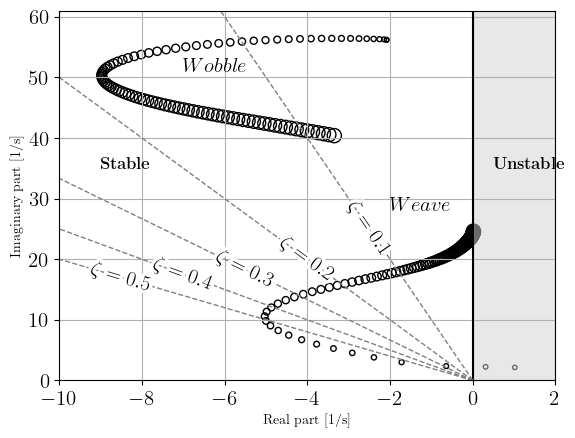

In [67]:
DampingFactor = np.arange(0.1, 0.6, 0.1)
img_df = np.arange(0, 75, 10)
DF_total = []

for ij in DampingFactor:
    real_df = -img_df*ij
    DF_total.append(real_df)

fig, ax1 = plt.subplots()

wobble = []
weave = []
chi_weave = []
chi_wobble = []

sizecounter = 0
for k in A_total:
    u = np.linalg.eigvals(np.dot(E_inv, k))
    u2 = filter_positive_imaginary_part(u)
    wobble.append(u2[0])
    weave.append(u2[1])
    chi_wobble.append(Damping_ratio(u2[0]))
    chi_weave.append(Damping_ratio(u2[1]))

    ax1.scatter(np.real(u2), np.imag(u2), facecolors="none", edgecolors="black", s=10+sizecounter)
    sizecounter += 1

ax1.axvline(x = 0, color = 'k', linestyle = '-')
ax1.set_xlabel('Real part [1/s]')
ax1.set_ylabel('Imaginary part [1/s]')
ax1.set_xlim([-10, 2])
ax1.set_ylim([0, 61])
txtwobble = (r'$Wobble$')
txtweave = (r'$Weave$')
txtcapsize = (r'$Capsize$')
ax1.text(-7, 51, txtwobble, size=15, math_fontfamily='cm')
ax1.text(-2, 28, txtweave, size=15, math_fontfamily='cm')
ax1.text(-9, 35, r'\textbf{Stable}', size=12)
ax1.text(0.5, 35, r'\textbf{Unstable}', size=12)
ax1.fill_betweenx(np.arange(0, 66), 0, 10, where=(np.arange(0, 66) >= 0), color='lightgray', alpha=0.5)
ax1.grid()

ax1.plot(DF_total[0], img_df, color = 'grey', linestyle = '--', linewidth = 1, label = r'$\zeta = 0.1$')
ax1.plot(DF_total[1], img_df, color = 'grey', linestyle = '--', linewidth = 1, label = r'$\zeta = 0.2$')
ax1.plot(DF_total[2], img_df, color = 'grey', linestyle = '--', linewidth = 1, label = r'$\zeta = 0.3$')
ax1.plot(DF_total[3], img_df, color = 'grey', linestyle = '--', linewidth = 1, label = r'$\zeta = 0.4$')
ax1.plot(DF_total[4], img_df, color = 'grey', linestyle = '--', linewidth = 1, label = r'$\zeta = 0.5$')

labelLines(ax1.get_lines(), zorder = 5, color = 'k', fontsize = 15, xvals = (-1, -10))


plt.tick_params(labelsize=15)
plt.show()

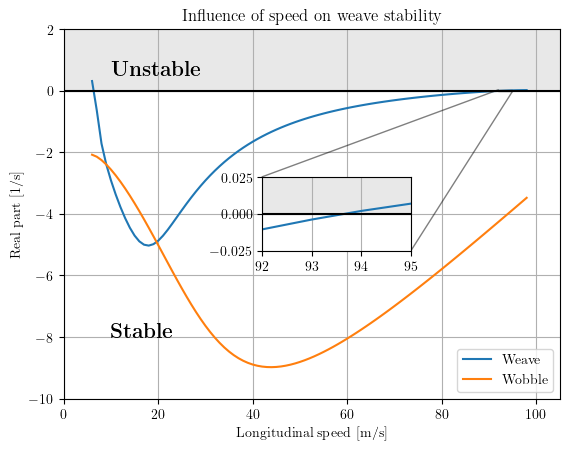

In [68]:
x_shadow = np.linspace(0, 105, 100)
y_shadow = np.linspace(5, 5, 100)

fig, ax = plt.subplots()

ax.plot(Speed_range[1:len(Speed_range)-1], weave[1:len(Speed_range)-1], label = 'Weave')
ax.plot(Speed_range[1:len(Speed_range)-1], wobble[1:len(Speed_range)-1], label = 'Wobble')

plt.title(' Influence of speed on weave stability')
plt.xlabel('Longitudinal speed [m/s]')
plt.ylabel('Real part [1/s]')
plt.fill_between(x_shadow, y_shadow, color='lightgray', alpha = 0.5)
plt.hlines(0, 0, 105, colors='k', linestyles='solid')
plt.text(10, 0.5, r'\textbf{Unstable}', size=15)
plt.text(10, -8, r'\textbf{Stable}', size=15)
plt.xlim(0, 105)
plt.legend(loc = 'lower right')
plt.ylim(-10, 2)
plt.grid()


xx1, xx2, yy1, yy2 = 92, 95, -0.025, 0.025
# axins = ax.inset_axes([0.5, 0.0625, 0.45, 0.4],
#     xlim=(xx1, xx2), ylim=(yy1, yy2))
axins = ax.inset_axes([0.4, 0.4, 0.3, 0.2],
    xlim=(xx1, xx2), ylim=(yy1, yy2))

axins.plot(Speed_range, weave)
axins.fill_between(x_shadow, y_shadow, color='lightgray', alpha = 0.5)
axins.hlines(0, 0, 105, colors='k', linestyles='solid')
axins.grid()
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()

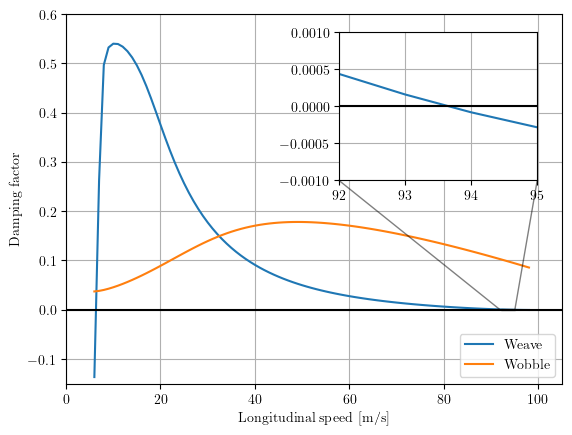

In [72]:
fig_2, ax_2 = plt.subplots()

ax_2.plot(Speed_range[1:len(Speed_range)-1], chi_weave[1:len(Speed_range)-1], label = 'Weave')
ax_2.plot(Speed_range[1:len(Speed_range)-1], chi_wobble[1:len(Speed_range)-1], label = 'Wobble')

plt.title(' Influence of speed on damping factor')
plt.xlabel('Longitudinal speed [m/s]')
plt.ylabel('Damping factor')
plt.hlines(0, 0, 105, colors='k', linestyles='solid')
plt.xlim(0, 105)
plt.ylim(-0.15, 0.6)
plt.legend(loc = 'best')
plt.grid()

xx1_2, xx2_2, yy1_2, yy2_2 = 92, 95, -0.001, 0.001
axins_2 = ax_2.inset_axes([0.55, 0.55, 0.4, 0.4],
    xlim=(xx1_2, xx2_2), ylim=(yy1_2, yy2_2))

axins_2.plot(Speed_range, chi_weave)
axins_2.hlines(0, 0, 105, colors='k', linestyles='solid')
axins_2.grid()
ax_2.indicate_inset_zoom(axins_2, edgecolor="black")

plt.show()
